In [40]:
import numpy as np
import pandas as pd
from scipy import signal

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
SAMPLING_FREQUENCY=200
NUMBER_OF_SAMPLES=60
LOWER_CUT=10
HIGHER_CUT=30
NOTCH=50
ORDER=4
TAKE_FOI=True
NUMBER_OF_CHANNELS=8
TESTING=True
MODE='TRAINING'

In [43]:
df_left = pd.read_csv('auto_left.csv')

In [44]:
df_left.shape

(12000, 9)

In [45]:
df_left=df_left[:NUMBER_OF_SAMPLES*SAMPLING_FREQUENCY]
channels=[df_left['1'],df_left['2'],df_left['3'],df_left['4'],df_left['5'],df_left['6'],df_left['7'],df_left['8']]
i=['1','2','3','4','5','6','7','8']
y_left=df_left['label']
y_left=y_left[:NUMBER_OF_SAMPLES]

arr_left= []
for ch,x in zip(channels,i):    
    ch=np.asarray(df_left[x],dtype=np.float64)
    ch.flatten()
    ch=ch.reshape(NUMBER_OF_SAMPLES,SAMPLING_FREQUENCY)
    arr_left.append(ch)
arr_left=np.array(arr_left)

In [46]:
def FFT(sequence,mag_2D=False,plot_data=False):
    
    arr=np.array(sequence)
    fft_coeff=np.fft.rfft(arr)
    real_part=np.real(fft_coeff)
    imag_part=np.imag(fft_coeff)
    mag=np.sqrt((real_part*real_part)+(imag_part*imag_part))
    
    if not TESTING:
        mag[:,:,0]=0#Removing THE DC COMPONENT
    elif mag_2D:
        mag[:,0]=0
    else:
        mag[0]=0
    print("FOURIER_TRANSFORM-'{mag}'".format(mag=mag.shape))
    if plot_data:
        plt.plot(mag)
    return mag


In [47]:
def filtering(sequence,lower_cut=LOWER_CUT,higher_cut=HIGHER_CUT,order=ORDER,notch=NOTCH,return_both=False,fs=SAMPLING_FREQUENCY):
    
    nyq=0.5*fs #normalizing
    low=lower_cut/nyq
    high=higher_cut/nyq
    sequence=sequence/nyq
    Q=30 #Q-factor
    w0=notch/nyq #Normalizing the notch
    
    b_notch,a_notch=signal.iirnotch(w0,Q)         #Designing the NOTCH filter at 50Hz
    
    sequence_after_notch=signal.lfilter(b_notch,a_notch,sequence) #Filtering The 50Hz component
    
    b_bandpass,a_bandpass=signal.butter(order,[low,high],btype='band')
    
    sequence_after_bandpass=signal.lfilter(b_bandpass,a_bandpass,sequence)
    
    if return_both:
        return  sequence_after_notch,sequence_after_bandpass
    else:
        #print(sequence_after_bandpass.shape)
        return sequence_after_bandpass

In [48]:
def DEPRECIATED_ARR(TAKE_FOI=True):
    arr_left=data_left()
    arr_right=data_right()
    filtered_array_left=filtering(arr_left)
    frequency_array_left=FFT(filtered_array_left)
    
    filtered_array_right=filtering(arr_right)
    frequency_array_right=FFT(filtered_array_right)
    
    if TAKE_FOI:
        frequency_array_left=frequency_array_left[:,:,LOWER_CUT:HIGHER_CUT+1]
        frequency_array_right=frequency_array_right[:,:,LOWER_CUT:HIGHER_CUT+1]
        print("Final Frequency shape'{freq}'".format(freq=frequency_array_right.shape))
    return frequency_array_left,frequency_array_right 

FOURIER_TRANSFORM-'(101,)'


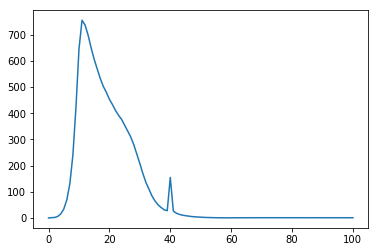

In [52]:
X=FFT(filtering(arr_left[0][0]),plot_data=True)

FOURIER_TRANSFORM-'(101,)'


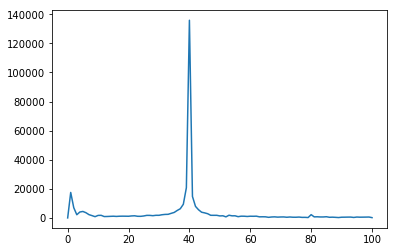

In [53]:
Y=FFT(arr_left[0][0],plot_data=True)

FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'
FOURIER_TRANSFORM-'(101,)'


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


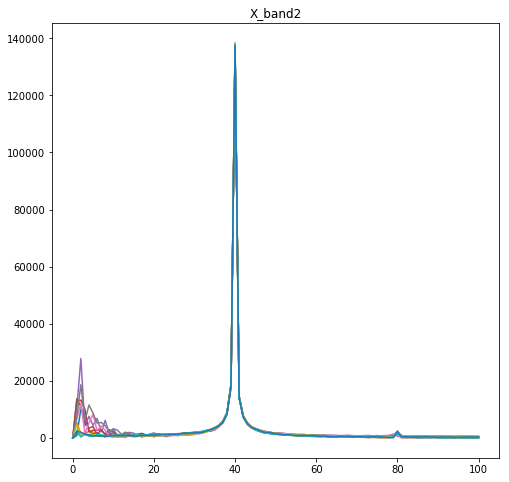

In [33]:
plt.figure(figsize=(8,8))

for i in range(10,21,1):
    X=FFT(arr_left[0][i],plot_data=True)
    plt.title('X_band2')
            
plt.legend()